In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('kaggle/input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

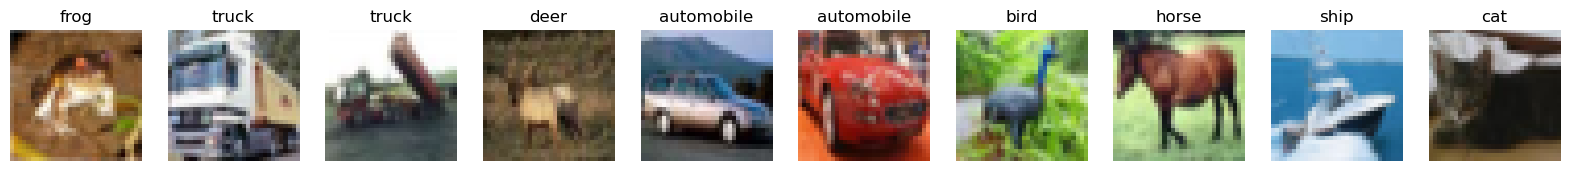

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Specify the folder where the CIFAR-10 batch files are
cifar10_dir = 'kaggle/cifar-10-python/cifar-10-batches-py'

# Load the label names
meta_data_dict = load_cifar_batch(os.path.join(cifar10_dir, 'batches.meta'))
label_names = meta_data_dict[b'label_names']

# Load one batch for demonstration (e.g., data_batch_1)
batch_1_dict = load_cifar_batch(os.path.join(cifar10_dir, 'data_batch_1'))
train_images = batch_1_dict[b'data']
train_labels = batch_1_dict[b'labels']

# print(images.data.shape)

# Reshape the images
train_images = train_images.reshape((10000, 3, 32, 32)).transpose(0, 2, 3, 1)

# print(images.data.shape)

# Display the first 10 images and labels
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(train_images[i])
    plt.title(label_names[train_labels[i]].decode('utf-8'))  # Decoding from bytes to string
    plt.axis('off')
plt.show()


In [3]:
# Read the test file, note that it has no labels and needs to be used with your model inference to predict outputs.

def load_cifar_batch(file):
    with open(file, 'rb') as fo:
        batch = pickle.load(fo, encoding='bytes')
    return batch

# Load the batch
cifar10_batch = load_cifar_batch('kaggle/cifar_test_nolabels.pkl')

# Extract images
# images = cifar10_batch[b'data'].reshape(-1, 3, 32, 32).permute(0, 2, 3, 1) 

# Extracting images and reshape
images = cifar10_batch[b'data'].reshape(-1, 3, 32, 32)
# Transposing dimensions
images = np.transpose(images, (0, 2, 3, 1))


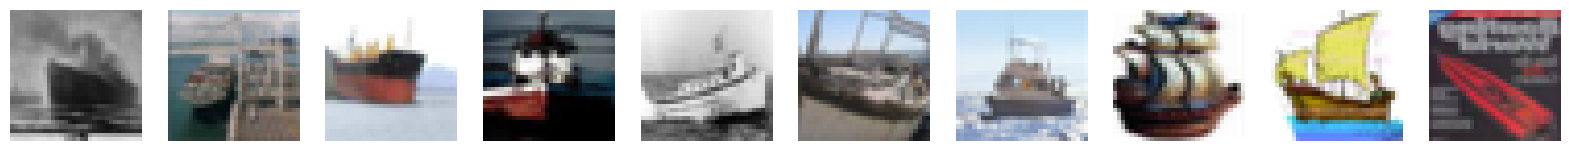

In [4]:
# Extract images and convert back to image format
images = cifar10_batch[b'data']
# Reshape to (number of images, width, height, channels)
# images = images.reshape((-1, 3, 32, 32)).permute(0, 2, 3, 1)
images = cifar10_batch[b'data'].reshape(-1, 3, 32, 32)

# Transpose dimensions
images = np.transpose(images, (0, 2, 3, 1))

# Display the first 10 images
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [4]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [6]:
# with open('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_1', 'rb') as file:
#     data_batch_1 = pickle.load(file)
# with open('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_1', 'rb') as file:
#     # data_batch_1 = file.read()
#     data_batch_1 = unpickle(file)

# importing batches 1 to 5

data_batch_1 = unpickle('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_1')
# print(data_batch_1)

data_batch_1 = unpickle('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_2')
# print(data_batch_2)

data_batch_1 = unpickle('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_3')
# print(data_batch_3)

data_batch_1 = unpickle('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_4')
# print(data_batch_4)

data_batch_1 = unpickle('kaggle/cifar-10-python/cifar-10-batches-py/data_batch_5')
# print(data_batch_5)


In [7]:
print(len(data_batch_1[b'data']))
# print(len(data_batch_1.data))

10000


In [8]:
# shape of the images
print(images.data.shape)

(10000, 32, 32, 3)


In [9]:
# print(images.transpose())

In [10]:
with open('kaggle/cifar-10-python/cifar-10-batches-py/batches.meta', 'rb') as file:
    batches_meta = pickle.load(file)

In [11]:
print(len(batches_meta))

3


In [12]:
print(batches_meta)

{'num_cases_per_batch': 10000, 'label_names': ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], 'num_vis': 3072}


In [20]:
# pip install torch==2.2.1 torchvision==0.17.1 torchaudio==2.2.1

In [21]:
# pip install torch torchvision torchaudio

In [14]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models

# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torchvision import datasets, transforms

In [17]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [19]:

trainset = datasets.CIFAR10(root='./kaggle/cifar-10-python', train=True, download=False, transform=transform)
testset = datasets.CIFAR10(root='./kaggle/cifar-10-python', train=False, download=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False)

# Step 2: Define the CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Step 3: Train the Model
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(10):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1} loss: {running_loss / len(trainloader)}')

# Step 4: Test the Model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')

Epoch 1 loss: 2.2066870080235668
Epoch 2 loss: 1.9154804573034692
Epoch 3 loss: 1.7395378314625576
Epoch 4 loss: 1.6268562279698793
Epoch 5 loss: 1.5314270407342545
Epoch 6 loss: 1.4508152553797378
Epoch 7 loss: 1.3856422126750507
Epoch 8 loss: 1.3370074893507506
Epoch 9 loss: 1.2868241029017418
Epoch 10 loss: 1.245774487705182
Accuracy on test set: 55.36%


In [22]:
for epoch in range(20):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1} loss: {running_loss / len(trainloader)}')

# Step 4: Test the Model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')

Epoch 1 loss: 1.207152423651322
Epoch 2 loss: 1.171347201175397
Epoch 3 loss: 1.1410490910110571
Epoch 4 loss: 1.1061186476436722
Epoch 5 loss: 1.077716239882857
Epoch 6 loss: 1.048892527437576
Epoch 7 loss: 1.019580395782695
Epoch 8 loss: 0.9918550582188169
Epoch 9 loss: 0.9655321277011081
Epoch 10 loss: 0.9387280986741986
Epoch 11 loss: 0.9140851625701045
Epoch 12 loss: 0.8897253867915219
Epoch 13 loss: 0.866868433440128
Epoch 14 loss: 0.8426949099811447
Epoch 15 loss: 0.8174987453633867
Epoch 16 loss: 0.8005284109079015
Epoch 17 loss: 0.7800231107970332
Epoch 18 loss: 0.7547664328304398
Epoch 19 loss: 0.7355305432053783
Epoch 20 loss: 0.7174357910595281
Accuracy on test set: 67.38%


In [20]:
print(len(testloader))

79


In [26]:
print(testloader)

In [26]:
# test_predictions = []
# test_image_ids = []

# with torch.no_grad():
#     for inputs, labels, ids in testloader:
#         outputs = model(inputs)
#         _, preds = torch.max(outputs, 1)
#         test_predictions.extend(preds.tolist())
#         test_image_ids.extend(ids)

# # Step 10: Create a DataFrame and save to CSV
# df = pd.DataFrame({'ID': test_image_ids, 'Labels': test_predictions})
# df.to_csv('predictions.csv', index=False)

# Step 10: Make predictions on the test set and store in a list
test_predictions = []
test_image_ids = set()  # Create a set to store unique image IDs
prediction_id_set = set(range(10000))


with torch.no_grad():
    for inputs, ids in testloader:
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.tolist())
        test_image_ids.update(prediction_id_set)  # Add image IDs to the set

# Step 11: Create a DataFrame and save to CSV
test_image_ids = list(test_image_ids)  # Convert the set back to a list
df = pd.DataFrame({'ID': test_image_ids, 'Labels': test_predictions})
df.to_csv('predictions.csv', index=False)

In [2]:


import torch
from torchvision import datasets, transforms
import pandas as pd
import os

# Step 1: Define the data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])



In [24]:
# Step 2: Load the 5 batches of custom dataset
custom_dataset = []
image_ids = []
labels = []

# for batch_file in ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']:
#     batch_data = torch.load(os.path.join('kaggle/cifar-10-python/cifar-10-batches-py', batch_file)) 
#     custom_dataset.extend(batch_data['data'])
#     image_ids.extend(batch_data['ids'])
#     labels.extend(batch_data['labels'])


for batch_file in ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5']:
    # with open(os.path.join('kaggle/cifar-10-python/cifar-10-batches-py', batch_file), 'rb') as f:
    #     batch_data = pickle.load(f, encoding='bytes')
    #     unpickle('kaggle/cifar-10-python/cifar-10-batches-py' + str(batch_file))
    batch_data = unpickle('kaggle/cifar-10-python/cifar-10-batches-py/' + str(batch_file))
    custom_dataset.extend(batch_data[b'data'])
    # image_ids.extend(batch_data[b'ids'])
    labels.extend(batch_data[b'labels'])

# Step 3: Create a custom dataset object
custom_dataset = [(data, label) for data, label in zip(custom_dataset, labels)]

# Step 4: Split into train and validation sets
train_size = int(0.8 * len(custom_dataset))
val_size = len(custom_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(custom_dataset, [train_size, val_size])

# Step 5: Create data loaders
trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)



In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [29]:
# Step 6: Train the model
# ... (training code)
newModel = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(newModel.parameters(), lr=0.001, momentum=0.9)

num_epochs = 10
for epoch in range(num_epochs):
    # Training
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = newModel(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = running_loss / len(trainloader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')




RuntimeError: Input type (unsigned char) and bias type (float) should be the same

In [ ]:
# Step 7: Evaluate on validation set
# ... (validation code)
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in valloader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: {100 * correct / total}%')


# Step 8: Load the trained model
newModel = Net()
newModel.load_state_dict(torch.load('newModel.pth'))
newModel.eval()

# Step 9: Load the custom test dataset
test_dataset = datasets.ImageFolder(root='kaggle/cifar-10-python/cifar-10-batches-py/test_batch', transform=transform)
testloader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Step 10: Make predictions on the test set and store in a list
test_predictions = []
test_image_ids = []
prediction_id = 0

with torch.no_grad():
    for inputs, ids in testloader:
        outputs = newModel(inputs)
        _, preds = torch.max(outputs, 1)
        test_predictions.extend(preds.tolist())
        test_image_ids.extend(list(prediction_id))
        prediction_id += 1

# Step 11: Create a DataFrame and save to CSV
df = pd.DataFrame({'ID': test_image_ids, 'Labels': test_predictions})
df.to_csv('predictions.csv', index=False)